In [1]:
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import KMeans, DBSCAN
import multiprocessing
from pathlib import Path
from pprint import pprint

In [2]:
DATA_PATH = Path("../data")
all_csvs = list(DATA_PATH.glob("*.csv"))
pprint(all_csvs)

[WindowsPath('../data/hashtag_donaldtrump.csv'),
 WindowsPath('../data/hashtag_joebiden.csv')]


In [3]:
## Only pick these columns
USE_COLS = [
    'created_at', 'tweet', 'likes', 'retweet_count',
    'source', 'user_screen_name', 'lat',
    'long', 'country', 'state'
]

## Number of rows to include from each CSV
N_ROWS = 10000

In [4]:
trump = pd.read_csv(all_csvs[0],nrows=N_ROWS,usecols=USE_COLS,lineterminator="\n")
biden = pd.read_csv(all_csvs[1],nrows=N_ROWS,usecols=USE_COLS,lineterminator="\n")
df = pd.concat([trump,biden])

In [5]:
df.head()

,created_at,tweet,likes,retweet_count,source,user_screen_name,lat,long,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,elsollatinonews,25.774270,-80.193660,United States of America,Florida
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,MediasetTgcom24,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,snarke,45.520247,-122.674195,United States of America,Oregon
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,trumpytweeter,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Ranaabtar,38.894992,-77.036558,United States of America,District of Columbia


In [6]:
data = df['tweet'].to_list()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(data)

In [8]:
print(vectorizer.get_feature_names())
print(X.shape)

 'zensurgesetz', 'zensurkampagne', 'zensurkampagnen', 'zensurversuch', 'zeo5eblvxb', 'zeoat9zsw1', 'zereuskrol', 'zero', 'zero_lupo', 'zerohedge', 'zerotolerance', 'zerrissen', 'zerschlagen', 'zersetzend', 'zerstört', 'zerstörung', 'zervos', 'zestimate', 'zestimates', 'zet', 'zetkueyuri', 'zette', 'zetten', 'zeug', 'zeus', 'zevwm6g7rq', 'zey59oeqgj', 'zeyffhojoj', 'zf5nrhmoso', 'zf7aa7xhp6', 'zfbi9kdgqh', 'zfbyhrqvgb', 'zfcwosoz5s', 'zfdl1pzwiv', 'zffacmeb9n', 'zfh0avmzqc', 'zfhw0nwmu9', 'zfjzf2119', 'zfpdltwirp', 'zfq4udijz4', 'zfq96fx8ax', 'zfts5zkhue', 'zg0cy01aua', 'zgazda66', 'zgbbmblmqq', 'zgf7esysnz', 'zggtgdyjzy', 'zgigcqtnty', 'zglife', 'zgo6r1zyuo', 'zgocu97f4z', 'zgq9e8fcwi', 'zgqtgvyeqx', 'zgqzyterlm', 'zgspuudypb', 'zgsscq95vd', 'zgt5loujsf', 'zgtoimhuqz', 'zgzkqti9ss', 'zh4tpgl05s', 'zhagvyfz3k', 'zhangfang09', 'zhbi7u4r9o', 'zhbq99dq6n', 'zhcoszi0f5', 'zheqvwyxoa', 'zhiokli4sh', 'zhjrqtheqt', 'zhnxxt7eux', 'zhos9dedka', 'zhrxrqoroz', 'zhvi7zharm', 'zhzdtwfova', 'zi', 'zi

In [9]:
print(X[0,])

  (0, 1903)	0.22429982411453153
  (0, 50957)	0.2177187399630947
  (0, 15398)	0.22429982411453153
  (0, 36520)	0.22429982411453153
  (0, 10099)	0.06609137177420454
  (0, 21687)	0.06608066902236172
  (0, 4880)	0.19075554531447445
  (0, 9942)	0.22429982411453153
  (0, 29475)	0.22429982411453153
  (0, 33995)	0.22429982411453153
  (0, 15278)	0.19916770566200165
  (0, 15566)	0.22429982411453153
  (0, 12343)	0.19268445669385864
  (0, 4443)	0.22429982411453153
  (0, 18420)	0.18748193606202884
  (0, 12844)	0.17872051335687145
  (0, 15202)	0.1217025406124495
  (0, 29514)	0.2018621386611113
  (0, 51856)	0.2177187399630947
  (0, 35020)	0.14128708395186917
  (0, 35351)	0.22429982411453153
  (0, 40014)	0.13304686745495847
  (0, 41550)	0.1650442506086086
  (0, 14004)	0.07786067874393571
  (0, 36727)	0.12231260983477976
  (0, 13285)	0.175796166462056
  (0, 24373)	0.05311132839689738
  (0, 17713)	0.1345044457207108
  (0, 15536)	0.21462174819857815
  (0, 15227)	0.15501862559951632


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

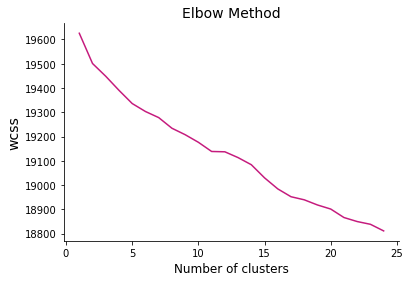

In [11]:
wcss = []
for i in range(1,25):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,25),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [12]:
true_k = 11
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_



Cluster: 0
Titles


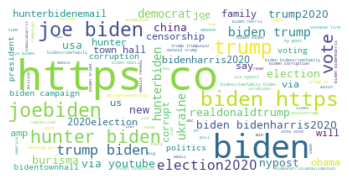

Cluster: 1
Titles


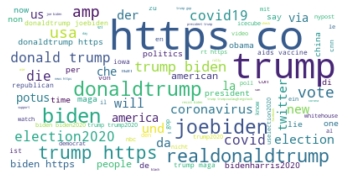

Cluster: 2
Titles


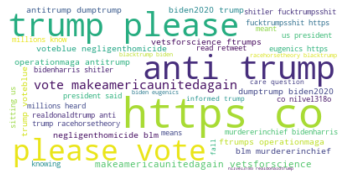

Cluster: 3
Titles


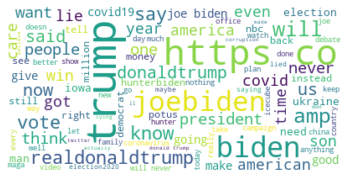

Cluster: 4
Titles


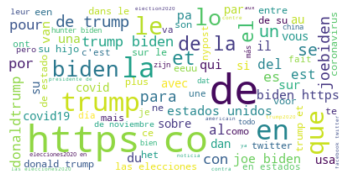

Cluster: 5
Titles


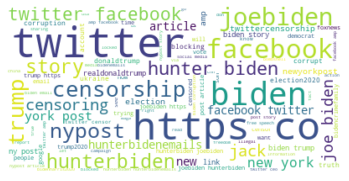

Cluster: 6
Titles


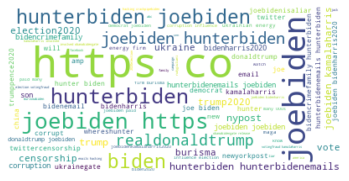

Cluster: 7
Titles


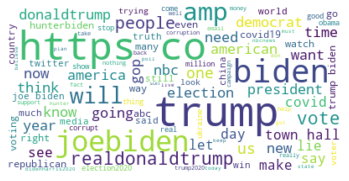

Cluster: 8
Titles


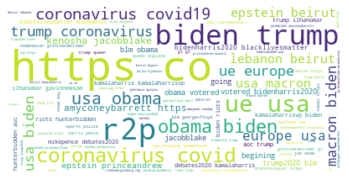

Cluster: 9
Titles


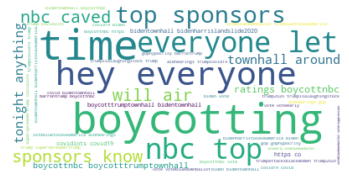

Cluster: 10
Titles


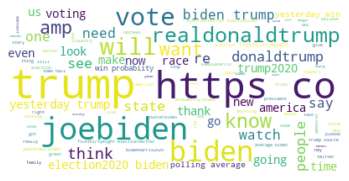

In [13]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':data}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()